<a href="https://colab.research.google.com/github/leesochang/Deeplearning2020/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0_hello_AND_tensorflow_20142224_%EC%9D%B4%EC%86%8C%EC%B0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AND 이해하기

In [9]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


1. AND 데이터로 바꾸어서 해보기
2. XOR 데이터로 바꾸어서 해보기

In [10]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
#AND
y_data = [[0],
          [0],
          [0],
          [1]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [11]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

* 안되는 네트워크 구조 예제. 되도록 고쳐봅시다. 

In [12]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [13]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [14]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [15]:
sess = tf.Session()

In [16]:
sess.run(tf.global_variables_initializer())

In [17]:
vcost =[]

In [18]:
for step in range(10001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
        
        print(cost1)

1.0665344
0.3757065
0.30980572
0.26527113
0.23262832
0.20744662
0.1873091
0.17077431
0.15692109
0.14512828
0.13495877


Text(0.5, 0, 'epoch')

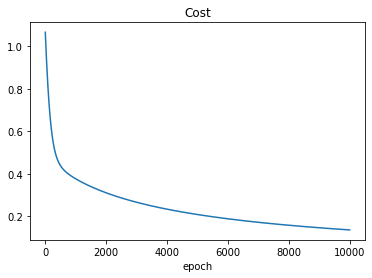

In [19]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [23]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,0]]})

In [24]:
print(test1[0][0])

0.14215659


In [25]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})

In [26]:
print(test1[0][0])

0.009477012


In [31]:
for i in range(4):
  test1 = sess.run(hypothesis, feed_dict = {X:[x_data[i]]})
  print(i, x_data[i], y_data[i], '---- predicted : ', test1)

0 [0. 0.] [0.] ---- predicted :  [[0.00692108]]
1 [0. 1.] [0.] ---- predicted :  [[0.1421266]]
2 [1. 0.] [0.] ---- predicted :  [[0.14215659]]
3 [1. 1.] [1.] ---- predicted :  [[0.79754287]]


In [32]:
sess.run(accuracy, feed_dict = {X: x_data, Y: y_data})

1.0